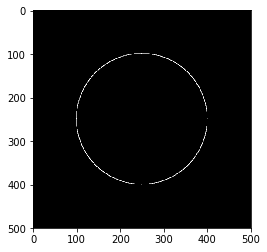

In [13]:
import numpy as np
import skimage.io as skio
import skimage.color as skolor
import skimage.util as skutil
import skimage.filters as skilter
import scipy.ndimage as scimage
import matplotlib.pyplot as plt

def gradient (image, f) :
    image = skolor.rgb2gray(image)  
    
    xgrad = np.empty(image.shape, dtype=np.int16)
    ygrad = np.empty(image.shape, dtype=np.int16)
    scimage.correlate(image, f, output=xgrad)
    f = np.rot90(f, 3)
    scimage.correlate(image, f, output=ygrad)
    
    grad = np.absolute(xgrad) + np.absolute(ygrad)
    grad = grad / np.max(grad)
    grad = np.around(grad * 255)
    grad = grad.astype(np.uint8)

    return grad

def threshold (image, threshold) :
    return (image > threshold).astype(np.uint8) * 255


im = skio.imread('cerc.png')
# grad = gradient(im, [[0,0,0],[0,-1,1],[0,0,0]])
grad = gradient(im, [[-1,0,1],[-2,0,2],[-1,0,1]])
plt.imshow(grad, 'gray')
plt.show()